# Part II - Investigate Ford GoBike System Dataset


## Investigation Overview


> I'm most interested in figuring out what features are best for predicting the duration of bike rides in the dataset. 


## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.There are 65,819 individual rides in the dataset with 16 features. The outliers and data sets containing null values were removed during the data cleaning step.

In [57]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [58]:

#import the Ford GoBike System Data
link='201902-fordgobike-tripdata.csv'
df=pd.read_csv(link)

#print the first five rows of the dataset
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,53:21.8,42:03.1,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [59]:
df.dropna(inplace=True)

In [60]:
#convert seconds to minutes for easier interpretation of the data
df['duration_min']=df['duration_sec']/60
df['duration_min']=df['duration_min'].round(2)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.75
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.90
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.17
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.42
5,1793,49:58.6,19:51.8,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,29.88


In [61]:
#calculate the age of the riders
#Note-This data set was obtained in 2019 hence the age was calculated to reflect their ages at that time.
df['member_age']=2019-df['member_birth_year']
df['member_age']=df['member_age'].astype(int)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,member_age
0,52185,32:10.1,01:56.0,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.75,35
2,61854,13:13.2,24:08.1,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.90,47
3,36490,54:26.0,02:36.8,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.17,30
4,1585,54:18.5,20:44.1,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.42,45
5,1793,49:58.6,19:51.8,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,29.88,60


In [62]:
df=df[df['duration_min']<100]
df.shape

(62654, 18)

### Distribution of Duration in Minutes
The duration has a normal distribution which peak between minutes 8 and 10.

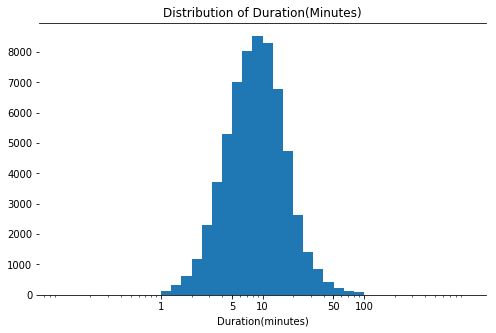

In [63]:
plt.figure(figsize=[8, 5])
#Get the ticks for bins between 0 and the maximum dutation
bins = 10 ** np.arange(-1, 3+0.1, 0.1)

# Generate the x-ticks for the graph
ticks = [1, 5, 10, 50, 100]
# Convert ticks into string values and to be displayed on the X axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=df, x='duration_min', bins=bins);
#transform X-axis to a log scale
plt.xscale('log')
plt.xlabel('Duration(minutes)')
plt.title('Distribution of Duration(Minutes)')

# Apply x-ticks
plt.xticks(ticks, labels);

## Age distribution of Riders
The riders' age distribution is bimodal. At 25 years of age there is a sharp peak, and at around 35 years of age another one. After 40 there is a steady decline in the number of riders.

In [64]:
#remove outliers using member_age
df=df[df['member_age']<80]

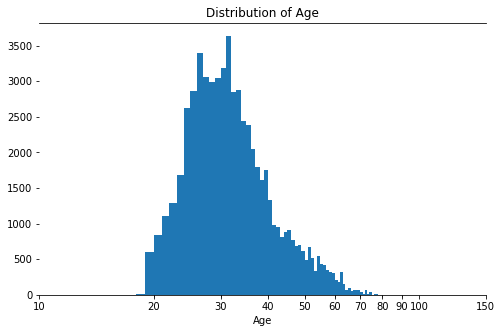

In [65]:
plt.figure(figsize=[8, 5])
# Generate the x-ticks you want to apply

# Generate the x-ticks for the graph
ticks = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150]
# Convert ticks into string values and to be displayed on the X axis
labels = ['{}'.format(v) for v in ticks]

bin_size=1
bins=np.arange(df['member_age'].min(), df['member_age'].max()+bin_size, bin_size)
plt.hist(data=df, x='member_age', bins=bins)
plt.xscale('log')
plt.xlabel('Age')
# Apply x-ticks
plt.xticks(ticks, labels)
plt.title('Distribution of Age');

### Distribution of Gender and User Type
> 90.3% of the overall riders were from subscribers while males make up for 74.4% of the overall rides which is a pretty high number.

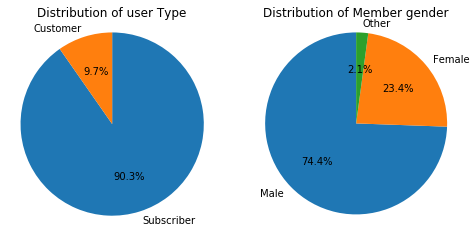

In [66]:
#plot a pie plot for easier comparison
plt.figure(figsize=[8, 5])
plt.subplot(1, 2, 1)
users = df['user_type'].value_counts()
plt.pie(users, labels = users.index, startangle = 90, counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.title('Distribution of user Type')

plt.subplot(1, 2, 2)
gen = df['member_gender'].value_counts()
plt.pie(gen, labels = gen.index, startangle = 90, counterclock = True, autopct='%1.1f%%');
plt.axis('square')
plt.title('Distribution of Member gender')
plt.show();


## Relationship between duration and age
There is an inverse relationship between duration of a ride and age of a riser, i.e the younger a rider is the longer the trip. Older riders tend to have shorter trips.

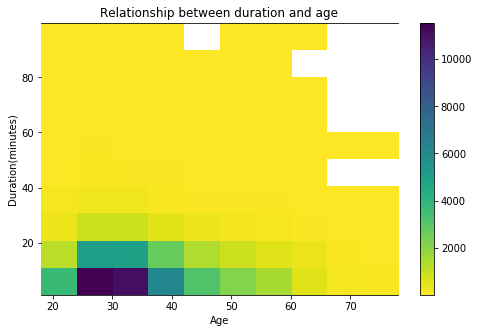

In [67]:
#plot a scatter plot
# plt.figure(figsize=[10, 5])

# plt.subplot(1, 2, 1)
# sns.regplot(data=df, x='member_age', y='duration_min', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)

# plt.subplot(1, 2, 2)
plt.figure(figsize=[8, 5])
plt.hist2d(data=df, x='member_age', y='duration_min', cmin=0.5, cmap='viridis_r')
plt.xlabel('Age')
plt.ylabel('Duration(minutes)')
plt.colorbar() 
plt.title('Relationship between duration and age');

### Bivariate Exploration of categorical variables

### Relationship between duration and gender
> Male riders make shorter trips as compared to females and other genders.

In [68]:
def sp(x, y):
    plt.figure(figsize=[8, 5])
    base_color = sns.color_palette()[0]
#     plt.subplot(1, 2, 1)
    sns.boxplot(x, y, data=df, color=base_color)
#     plt.subplot(1, 2, 2)
#     sns.boxplot(z, y, data=df, color=base_color)

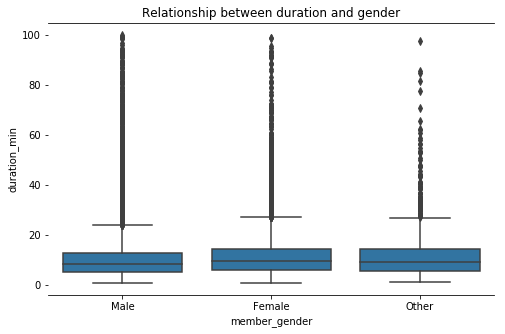

In [69]:
sp('member_gender', 'duration_min')
plt.title('Relationship between duration and gender');


### Relationship between duration and user type
 Customers make longer trips than subsriber.

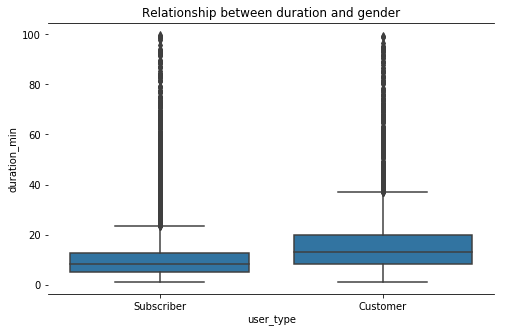

In [70]:
sp('user_type', 'duration_min')
plt.title('Relationship between duration and gender');

## Relationship between Duration, age and gender.
Riders from the age of 70-80 take shorter trips across all genders and they are fewer. It can also be noted that there is a high concentration of riders for other genders around the ages of 56-57.

In [71]:
def fg(x):
    g = sns.FacetGrid(data = df, col = x, size = 5, margin_titles = True)
    g.map(plt.scatter, 'member_age', 'duration_min', alpha=0.25)

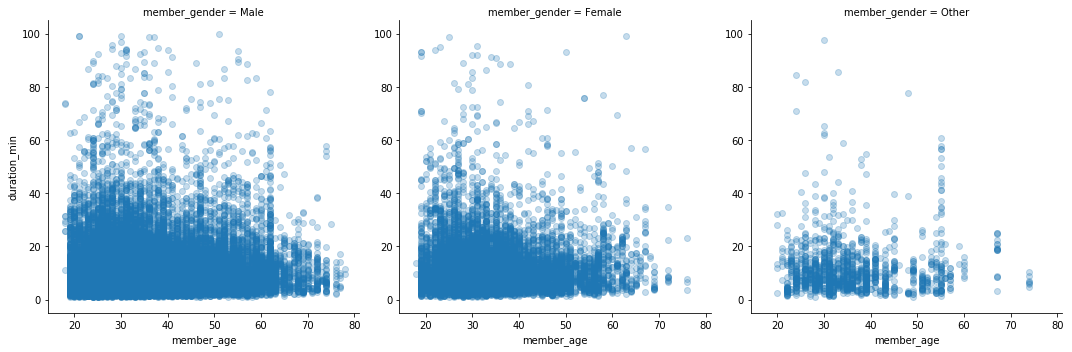

In [72]:
fg('member_gender')

## Conclusions
> From the above analysis it can be clearly observed that Gender and age determine the duration of a trip of a rider.

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [73]:
# Use this command if you are running this file in local
!jupyter nbconvert Ford_GoBike_System_Data_Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Ford_GoBike_System_Data_Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 529877 bytes to Ford_GoBike_System_Data_Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/opt/conda/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/opt/conda/lib/python3.6/site-packages/jupyter_core/application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 337, in start
    self.convert_notebooks()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 507, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  Fi